Athaya Rohadatul Yaqutah (5025221235)

# Import

In [661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from itertools import product



In [662]:
df = pd.read_csv("Customer_Data.csv") 
df = df.drop(columns=["cust_id"])  # Hapus kolom ID 
df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Exploratory Data Analysis

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

In [664]:
columns = df.columns
print(columns)

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')


In [665]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [666]:
# Check duplicated data
print(f"Number of dupilcated data: {df.duplicated().sum()}" )

Number of dupilcated data: 0


In [667]:
for i, col in enumerate(columns):
    print (f"Columns {i} = ", df[col].nunique())

Columns 0 =  8871
Columns 1 =  43
Columns 2 =  6203
Columns 3 =  4014
Columns 4 =  4452
Columns 5 =  4323
Columns 6 =  47
Columns 7 =  47
Columns 8 =  47
Columns 9 =  54
Columns 10 =  65
Columns 11 =  173
Columns 12 =  205
Columns 13 =  8711
Columns 14 =  8636
Columns 15 =  47
Columns 16 =  7


In [668]:
for i in columns:
    if (df[i].nunique() < 10):
        print ("Feature:\t", i, "\n", df[i].unique(), "\n#########################\n")

Feature:	 tenure 
 [12  8 11  9 10  7  6] 
#########################



In [669]:
print(df.isnull().sum())


balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64


In [670]:
df.dropna(inplace=True)

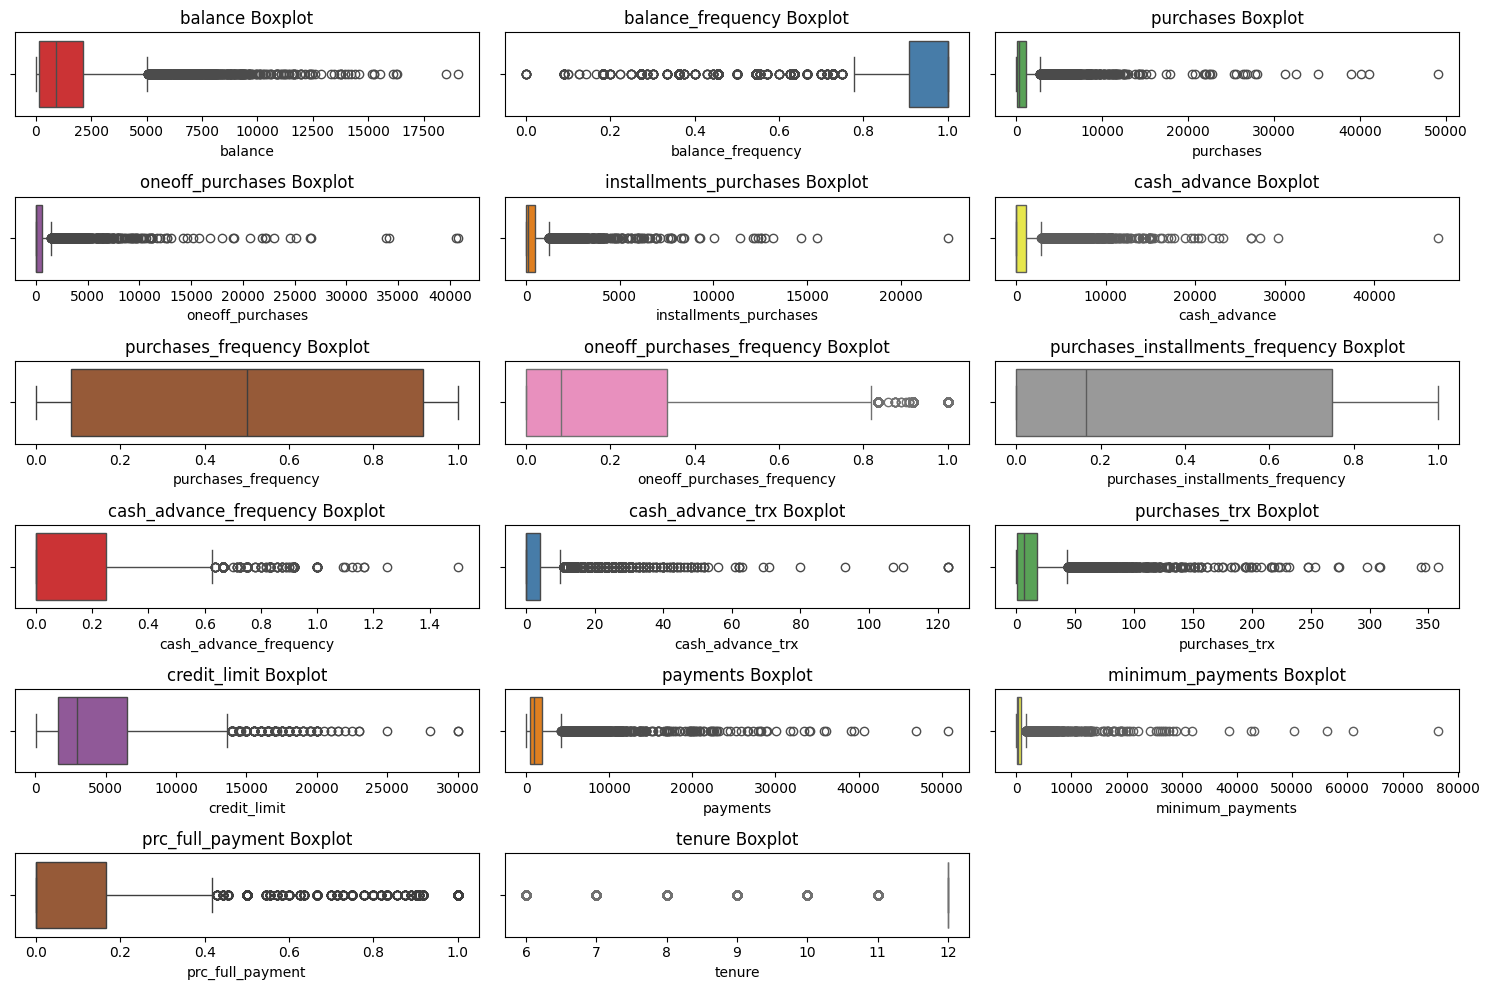

In [671]:
# Boxplot Visualization
col_box = ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
           'installments_purchases', 'cash_advance', 'purchases_frequency',
           'oneoff_purchases_frequency', 'purchases_installments_frequency',
           'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
           'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']

color_palette = sns.color_palette("Set1", len(col_box))
plt.figure(figsize=(15, 10))

for i, column in enumerate(col_box, 1):
    plt.subplot((len(col_box) // 3) + 1, 3, i)
    sns.boxplot(data=df, x=column, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

In [672]:
# Hitung Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hitung jumlah outlier per kolom
outliers_count = ((df < lower_bound) | (df > upper_bound)).sum()
print(outliers_count)

balance                              666
balance_frequency                   1511
purchases                            768
oneoff_purchases                     961
installments_purchases               811
cash_advance                         977
purchases_frequency                    0
oneoff_purchases_frequency           749
purchases_installments_frequency       0
cash_advance_frequency               341
cash_advance_trx                     794
purchases_trx                        716
credit_limit                         243
payments                             785
minimum_payments                     841
prc_full_payment                    1343
tenure                              1290
dtype: int64


In [673]:
# # Pilih kolom numerik yang akan dicek outliernya
# iqr_columns = df.select_dtypes(include=['number']).columns  

# # Ganti outlier dengan median untuk setiap kolom dalam iqr_columns
# for col in iqr_columns:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1

#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr

#     median_value = df[col].median()

#     # Ganti outliers dengan median
#     df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value

# print("Outliers diganti dengan median.")

In [674]:
# # Daftar kolom yang akan diperiksa outliernya
# cols_to_check = [
#     "balance_frequency", "purchases_frequency", "oneoff_purchases_frequency",
#     "purchases_installments_frequency", "cash_advance_frequency"
# ]

# # Menghitung Q1, Q3, dan IQR untuk kolom yang dipilih
# Q1 = df[cols_to_check].quantile(0.25)
# Q3 = df[cols_to_check].quantile(0.75)
# IQR = Q3 - Q1

# # Menggunakan IQR untuk menghapus baris yang memiliki outlier di kolom yang dipilih
# df_cleaned = df[~((df[cols_to_check] < (Q1 - 1.5 * IQR)) | (df[cols_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]

# print(df_cleaned.shape)


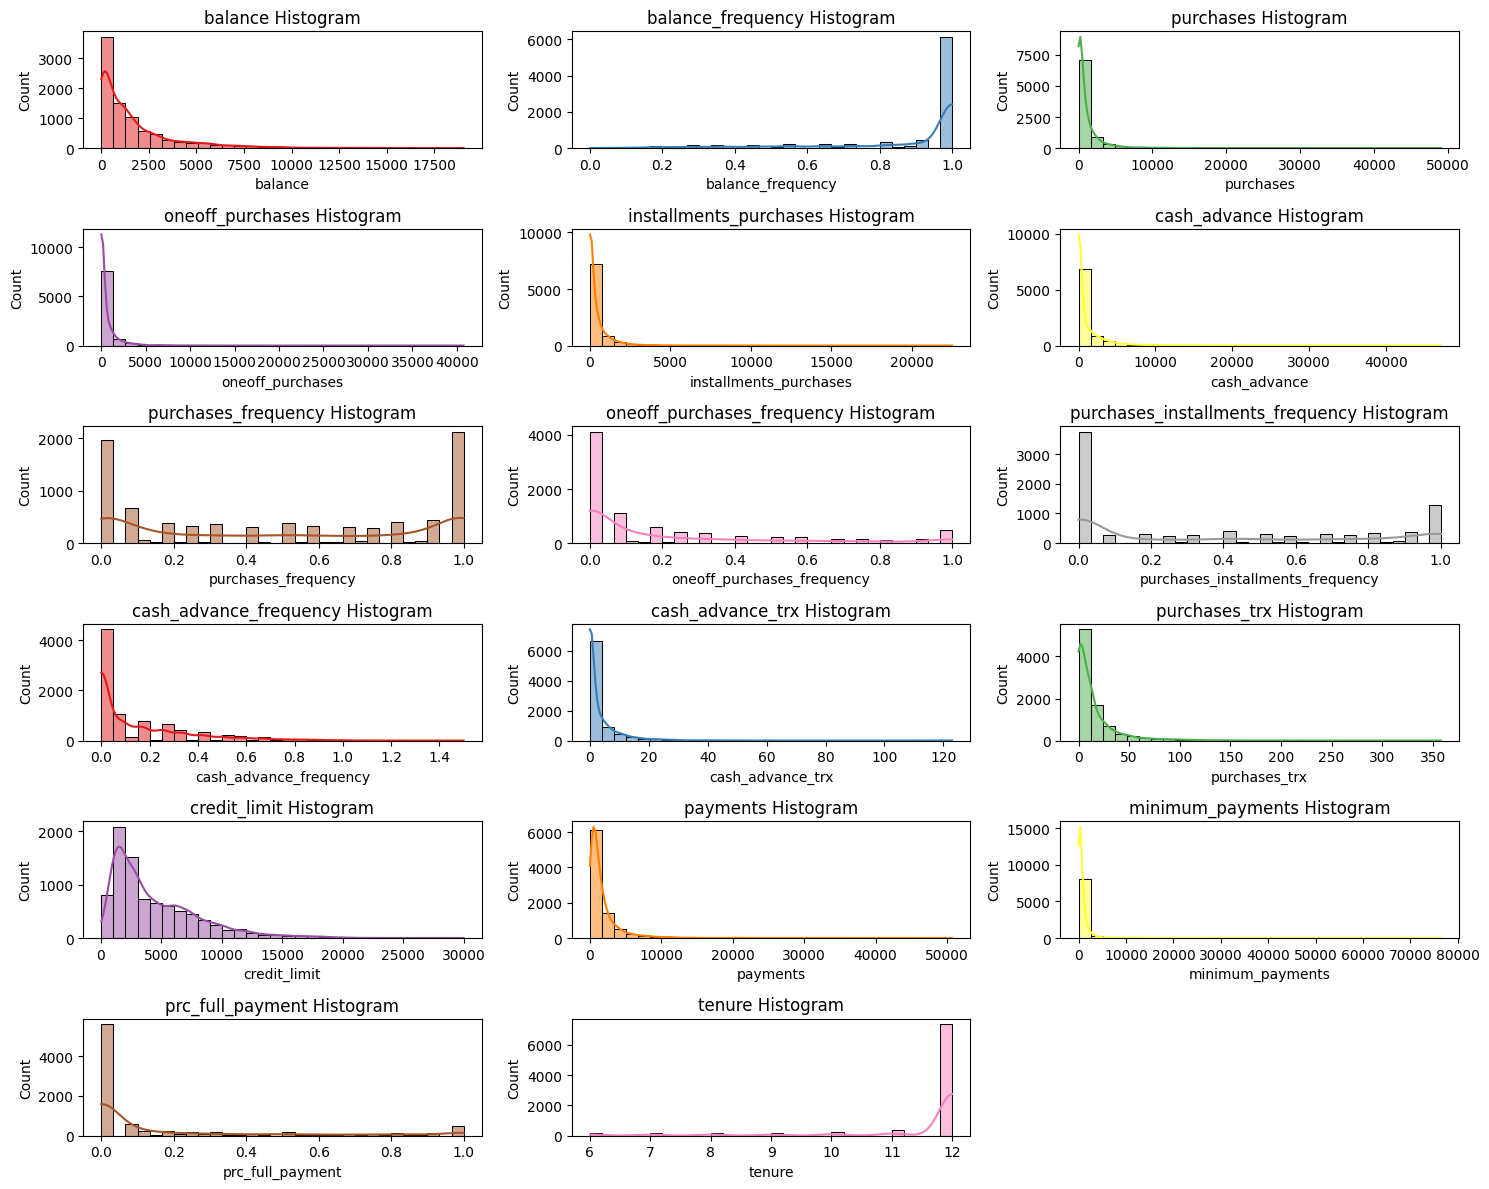

In [675]:
#Histogram setelah cleaning
col_hist = ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
            'installments_purchases', 'cash_advance', 'purchases_frequency',
            'oneoff_purchases_frequency', 'purchases_installments_frequency',
            'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
            'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']

color_palette = sns.color_palette("Set1", len(col_hist))

plt.figure(figsize=(15, 12))

for i, column in enumerate(col_hist, 1):
    plt.subplot((len(col_hist) // 3) + 1, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Histogram')

plt.tight_layout()
plt.show()


In [676]:
df = df.sample(n=1000, random_state=42)  # Ambil 1000 data secara acak
df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
1715,154.439292,1.000000,1047.94,440.00,607.94,0.000000,0.750000,0.083333,0.583333,0.000000,0,17,6000.0,1032.089965,173.484575,0.333333,12
2808,467.220993,1.000000,1110.17,640.17,470.00,814.088229,0.416667,0.083333,0.333333,0.250000,3,6,4000.0,2514.118359,185.120378,0.250000,12
6317,435.553960,1.000000,1522.06,1372.34,149.72,0.000000,0.833333,0.583333,0.750000,0.000000,0,24,3000.0,1878.606679,162.411202,0.000000,12
8234,61.628782,1.000000,457.31,0.00,457.31,0.000000,1.000000,0.000000,0.875000,0.000000,0,9,1500.0,364.254422,112.081828,0.666667,8
606,6787.661776,1.000000,99.50,0.00,99.50,7726.511679,0.833333,0.000000,0.750000,0.416667,10,10,8000.0,1775.139580,2293.582697,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,898.253159,0.857143,165.50,165.50,0.00,1157.345416,0.285714,0.285714,0.000000,0.142857,1,5,1200.0,375.839637,481.804214,0.000000,7
3483,1710.418727,0.800000,0.00,0.00,0.00,2813.620582,0.000000,0.000000,0.000000,0.300000,9,0,2500.0,1337.799917,508.122732,0.000000,10
7074,900.229315,1.000000,250.72,250.72,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,6,6500.0,2362.786253,259.315944,0.083333,12
4939,1367.301373,1.000000,231.41,0.00,231.41,0.000000,1.000000,0.000000,1.000000,0.000000,0,16,2500.0,107.242408,257.568640,0.000000,6


# Selection Feature & PCA

In [677]:
print(df.isnull().sum())

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64


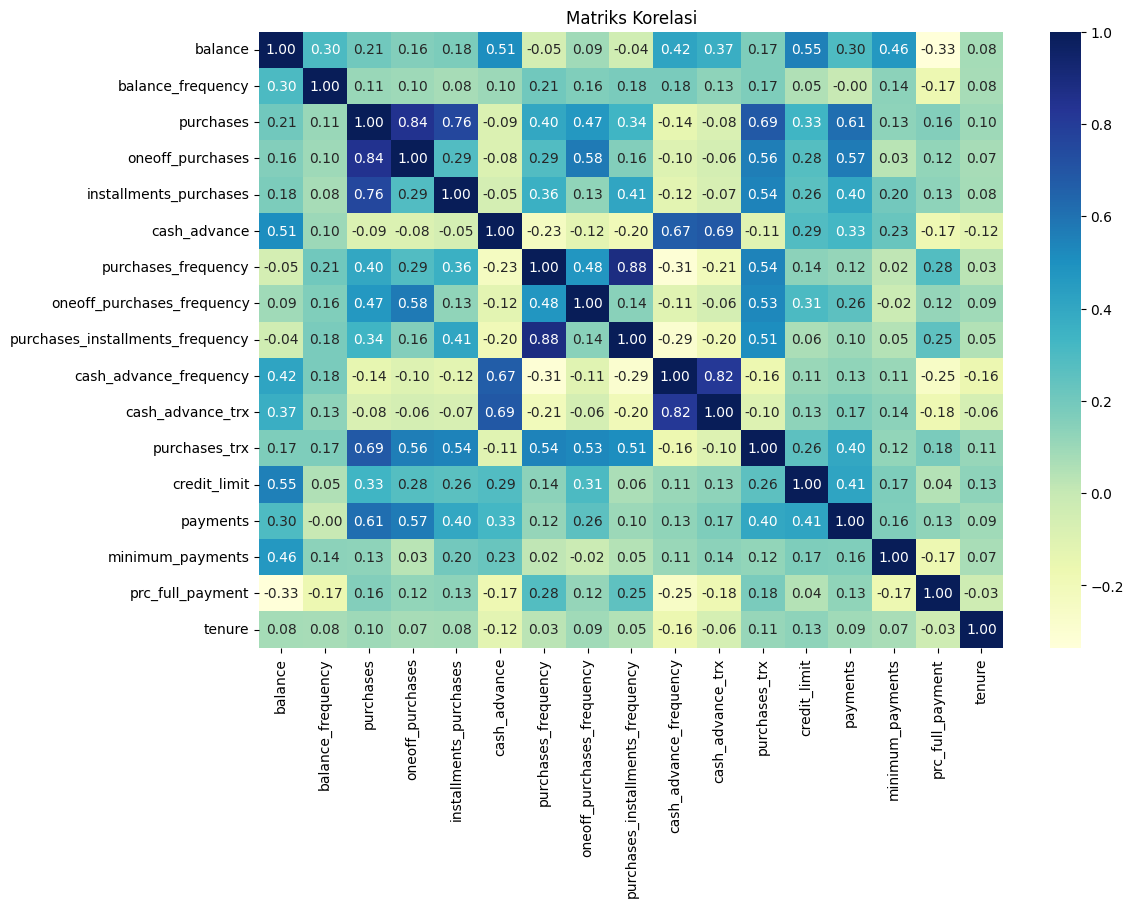

In [678]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

In [679]:
# # Daftar fitur yang dipilih untuk clustering berdasarkan Pola Pembelian
# selected_features = [
#     "purchases", "oneoff_purchases", "installments_purchases", "purchases_frequency", 
#     "oneoff_purchases_frequency", "purchases_trx", "purchases_installments_frequency"
# ]

# # Standarisasi hanya pada fitur yang dipilih
# scaler = StandardScaler().fit(df[selected_features])
# df_trans = scaler.transform(df[selected_features])

# # Konversi hasil standarisasi ke DataFrame
# df_standardized = pd.DataFrame(df_trans, columns=selected_features)

# # Tampilkan hasil dalam bentuk tabel
# print("Data setelah Standarisasi:")
# df_standardized

In [680]:
# # Daftar fitur yang dipilih untuk clustering berdasarkan korelasi tinggi dengan total pembelian
# selected_features = [
#     "oneoff_purchases", "installments_purchases", "purchases_trx", "purchases_frequency", "credit_limit"
# ]

# # Standarisasi hanya pada fitur yang dipilih
# scaler = StandardScaler().fit(df[selected_features])
# df_trans = scaler.transform(df[selected_features])

# # Konversi hasil standarisasi ke DataFrame
# df_standardized = pd.DataFrame(df_trans, columns=selected_features)

# # Tampilkan hasil dalam bentuk tabel
# print("Data setelah Standarisasi:")
# df_standardized

In [681]:
from sklearn.preprocessing import StandardScaler

# Daftar fitur yang dipilih untuk clustering
selected_features = ["balance", "purchases", "cash_advance", "credit_limit", "purchases_frequency"]


# Standarisasi hanya pada fitur yang dipilih
scaler = StandardScaler().fit(df[selected_features])
df_trans = scaler.transform(df[selected_features])

# Konversi hasil standarisasi ke DataFrame
df_standardized = pd.DataFrame(df_trans, columns=selected_features)

# Tampilkan hasil dalam bentuk tabel
print("Data setelah Standarisasi:")
df_standardized


Data setelah Standarisasi:


,balance,purchases,cash_advance,credit_limit,purchases_frequency
0,-0.692312,0.006025,-0.499620,0.397379,0.633911
1,-0.546362,0.035176,-0.050783,-0.146138,-0.199485
2,-0.561138,0.228126,-0.499620,-0.417896,0.842260
3,-0.735619,-0.270655,-0.499620,-0.825534,1.258960
4,2.402876,-0.438270,3.760291,0.940895,0.842260
...,...,...,...,...,...
995,-0.345234,-0.407352,0.138468,-0.907062,-0.526893
996,0.033738,-0.484881,1.051633,-0.553776,-1.241233
997,-0.344312,-0.367431,-0.499620,0.533258,0.008863
998,-0.126367,-0.376477,-0.499620,-0.553776,1.258960


In [682]:
# # # Fitur yang akan di-drop berdasarkan korelasi rendah
# # drop_cols = ["balance_frequency", "tenure", "prc_full_payment", "minimum_payments"]

# # # Drop fitur dengan korelasi rendah
# # df_filtered = df.drop(columns=drop_cols)

# # Standarisasi data
# scaler = StandardScaler().fit(df_filtered)
# df_trans = scaler.transform(df_filtered)

# # Konversi hasil standarisasi ke DataFrame
# df_standardized = pd.DataFrame(df_trans, columns=df_filtered.columns)

# # Tampilkan hasil dalam bentuk tabel
# print("Data setelah Standarisasi:")
# df_standardized

In [683]:
# # Standarisasi data tanpa menghapus kolom
# scaler = StandardScaler().fit(df)
# df_trans = scaler.transform(df)

# # Konversi hasil standarisasi ke DataFrame
# df_standardized = pd.DataFrame(df_trans, columns=df.columns)

# # Tampilkan hasil dalam bentuk tabel
# print("Data setelah Standarisasi:")
# df_standardized

In [684]:
print(df_standardized.isnull().sum())

balance                0
purchases              0
cash_advance           0
credit_limit           0
purchases_frequency    0
dtype: int64


In [685]:
# # PCA dengan 2 komponen utama
# pca = PCA(n_components=2)
# df_standardized = pca.fit_transform(df_standardized)

# # Standarisasi hasil PCA agar lebih mudah diinterpretasi
# df_standardized = scaler.fit_transform(df_standardized)

# # Konversi hasil PCA ke DataFrame
# df_standardized = pd.DataFrame(df_standardized, columns=["PC1", "PC2"])
# print("\nData setelah PCA:")
# print(df_standardized.head())

# # Menampilkan proporsi varians yang dijelaskan oleh masing-masing komponen utama
# print("\nPCA explained variance ratio:")
# print(" ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

In [686]:
# plt.scatter(df_standardized["PC1"], df_standardized["PC2"], s=50)
# plt.xlabel("PCA 1")
# plt.ylabel("PCA 2")
# plt.title("Visualisasi Scatter Plot Hasil PCA")
# plt.show()

# K-Means

In [687]:
# df_standardized = df_standardized.values

In [688]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

kmeans_set = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

wcss = []
silhouette_scores = []

# Loop untuk mencari inertia (WCSS), silhouette score, dan Calinski-Harabasz Score
for k in range(2, 10):  
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_standardized)
    
    inertia = kmeans.inertia_
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_standardized, labels)
    
    wcss.append(inertia)
    silhouette_scores.append(silhouette_avg)
    
    print(f'WCSS score for n_cluster = {k} is {inertia}')
    print(f'Silhouette score for n_clusters = {k} is {silhouette_avg}')


WCSS score for n_cluster = 2 is 3654.2522077215845
Silhouette score for n_clusters = 2 is 0.44731151181389117


WCSS score for n_cluster = 3 is 2831.0575881034856
Silhouette score for n_clusters = 3 is 0.331583093449332
WCSS score for n_cluster = 4 is 2299.749143410059
Silhouette score for n_clusters = 4 is 0.34656384576481264
WCSS score for n_cluster = 5 is 1960.0734211444571
Silhouette score for n_clusters = 5 is 0.344615098414301
WCSS score for n_cluster = 6 is 1757.1355206082044
Silhouette score for n_clusters = 6 is 0.3382397093319706
WCSS score for n_cluster = 7 is 1593.3704870328204
Silhouette score for n_clusters = 7 is 0.3323950738390674
WCSS score for n_cluster = 8 is 1479.059663780268
Silhouette score for n_clusters = 8 is 0.3227673614687466
WCSS score for n_cluster = 9 is 1382.858383859245
Silhouette score for n_clusters = 9 is 0.3267626316715961


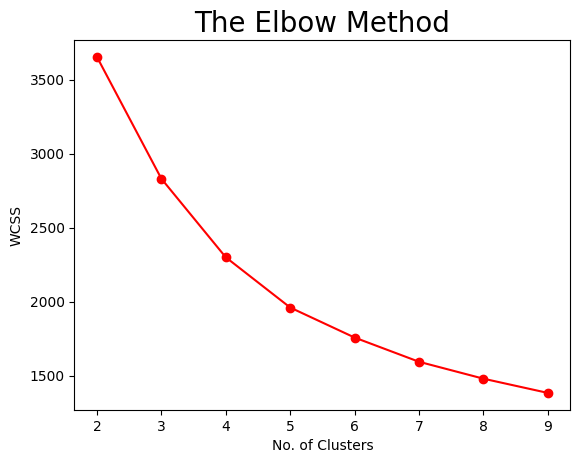

In [689]:
# Visualisasi Elbow Method
plt.plot(range(2, 10), wcss, marker='o', linestyle='-', color='r', label="WCSS")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

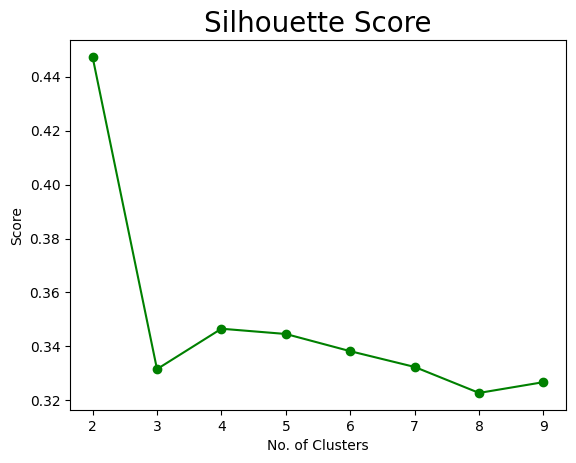

In [690]:
# Visualizing Silhouette Score
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='-', color='g', label="Silhouette Score")
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [691]:
# Create dict to store results of clustering algorithms for comparision
best_model = pd.DataFrame({'Model':[], 'Sil_score':[], 'setting':[]})

In [692]:
# Implementasi KMeans dengan k=2
kmeansmodel = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init='auto', random_state=42)

# Melakukan fitting dan prediksi cluster pada data yang sudah distandarisasi
y_kmeans = kmeansmodel.fit_predict(df_standardized)

# Menyimpan koordinat centroid dalam DataFrame
centroids = pd.DataFrame(kmeansmodel.cluster_centers_, columns=df_standardized.columns)

centroids.T


,0,1
balance,-0.355360,1.467000
purchases,-0.163437,0.674701
cash_advance,-0.235640,0.972771
credit_limit,-0.339407,1.401143
purchases_frequency,-0.047671,0.196795


In [693]:
centroids = pd.DataFrame(kmeansmodel.cluster_centers_, columns=df_standardized.columns)
print(centroids.columns)


Index(['balance', 'purchases', 'cash_advance', 'credit_limit',
       'purchases_frequency'],
      dtype='object')


In [694]:
# Store results of kmeans
best_model.loc[len(best_model.index)] = [
    f"Kmeans",
    silhouette_score(df_standardized, y_kmeans),
    {"n_clusters":2, **kmeans_set}]


In [695]:
# Adding the clusters column to the main dataframe (df_standardized) and store in new dataframe
df_result_kmeans = pd.concat([df_standardized, pd.DataFrame(y_kmeans, columns=['cluster'])], axis = 1)
df_result_kmeans

,balance,purchases,cash_advance,credit_limit,purchases_frequency,cluster
0,-0.692312,0.006025,-0.499620,0.397379,0.633911,0
1,-0.546362,0.035176,-0.050783,-0.146138,-0.199485,0
2,-0.561138,0.228126,-0.499620,-0.417896,0.842260,0
3,-0.735619,-0.270655,-0.499620,-0.825534,1.258960,0
4,2.402876,-0.438270,3.760291,0.940895,0.842260,1
...,...,...,...,...,...,...
995,-0.345234,-0.407352,0.138468,-0.907062,-0.526893,0
996,0.033738,-0.484881,1.051633,-0.553776,-1.241233,0
997,-0.344312,-0.367431,-0.499620,0.533258,0.008863,0
998,-0.126367,-0.376477,-0.499620,-0.553776,1.258960,0


In [696]:
# Menampilkan jumlah data di masing-masing cluster
cluster_counts = df_result_kmeans['cluster'].value_counts().sort_index()
print(cluster_counts)

cluster
0    805
1    195
Name: count, dtype: int64


In [697]:
# Tentukan palet warna berdasarkan jumlah cluster unik dalam dataset
def check_result(data):
    """Check results obtained from each algorithm and number of clusters
        data (DataFrame): original dataset + cluster column obtained from algorithm
    """
    
    # Pastikan palet warna sesuai dengan jumlah cluster unik
    dark_colors = sns.color_palette("dark", n_colors=data['cluster'].nunique())

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Count of cluster (countplot)
    sns.countplot(data=data, x='cluster', ax=axes[0], palette=dark_colors, 
                  saturation=1, edgecolor="#1c1c1c", linewidth=2)
    
    for container in axes[0].containers:
        axes[0].bar_label(container, label_type="center", padding=5, size=12, color="black", rotation=0,
        bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth": 2, "alpha": 1})

    # Draw pie plot
    slices = data['cluster'].value_counts().sort_index().values
    activities = [var for var in data['cluster'].value_counts().sort_index().index]
    
    wedges, texts, autotexts = axes[1].pie(
        slices,
        labels=activities,
        shadow=True,
        autopct='%1.1f%%',
        textprops=dict(size=16, color="black"),
        pctdistance=0.6,
        radius=1, 
        colors=dark_colors, 
        wedgeprops=dict(edgecolor="black", linewidth=2),
    )

    plt.legend(
        wedges, 
        data.cluster.value_counts().sort_index().index, 
        title="Clusters",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        edgecolor="black"
    )

    plt.suptitle('Count of Each Cluster', y=1.09, fontsize=14, fontweight="bold")
    plt.show()


C:\Users\Athaya Rohadatul\AppData\Local\Temp\ipykernel_17100\2837189729.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='cluster', ax=axes[0], palette=dark_colors,


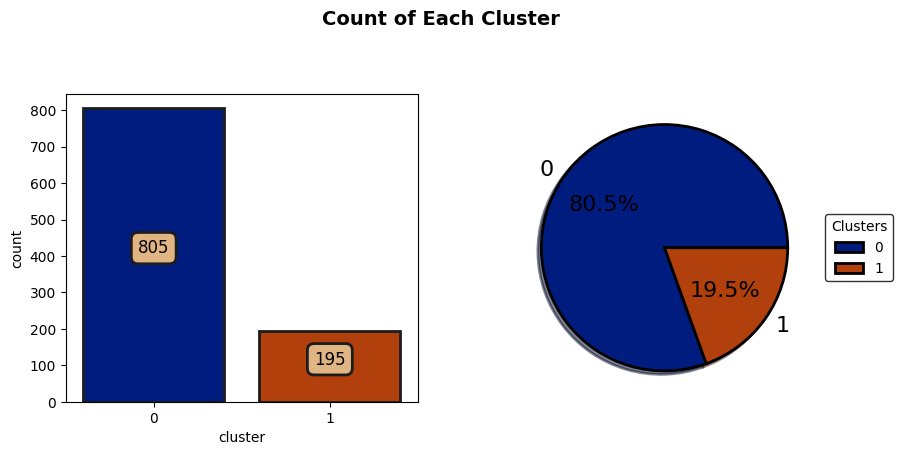

In [698]:
# Implement check result function for Kmeans
check_result(df_result_kmeans)

In [699]:
best_model

,Model,Sil_score,setting
0,Kmeans,0.447312,"{'n_clusters': 2, 'init': 'random', 'n_init': ..."


In [700]:
# Store Selected models in model variable
models = best_model.iloc[[0]]
models

,Model,Sil_score,setting
0,Kmeans,0.447312,"{'n_clusters': 2, 'init': 'random', 'n_init': ..."


In [701]:
# Setting of kmeans model
models.setting[0]


{'n_clusters': 2,
 'init': 'random',
 'n_init': 10,
 'max_iter': 300,
 'random_state': 42}

In [702]:
# Implement best Kmeans model again
kmeans = KMeans(**models.setting[0])
kmeans.fit(df_standardized)
pred_kmeans = kmeans.labels_

In [703]:
# Fit PCA and find 2 principal components for 2D visualization
pca = PCA(n_components = 2)
pcs = pca.fit_transform(df_standardized)
# Create a dataframe with the two components
pca_data = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
pca_data.head()


,pc1,pc2
0,-0.359848,0.801412
1,-0.442543,-0.020286
2,-0.669493,0.949330
3,-1.138844,0.919555
4,3.566555,-1.673781


In [704]:
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

PCA explained variance ratio:
 0.398 0.309


In [705]:
# Concatenate the clusters labels to the dataframe
kmeans_pca_2d = pd.concat([pca_data, pd.DataFrame({'cluster':pred_kmeans})], axis=1)
kmeans_pca_2d

,pc1,pc2,cluster
0,-0.359848,0.801412,0
1,-0.442543,-0.020286,0
2,-0.669493,0.949330,0
3,-1.138844,0.919555,0
4,3.566555,-1.673781,1
...,...,...,...
995,-0.842368,-0.692730,0
996,-0.084991,-1.640427,0
997,-0.231100,0.140458,0
998,-0.643571,0.796661,0


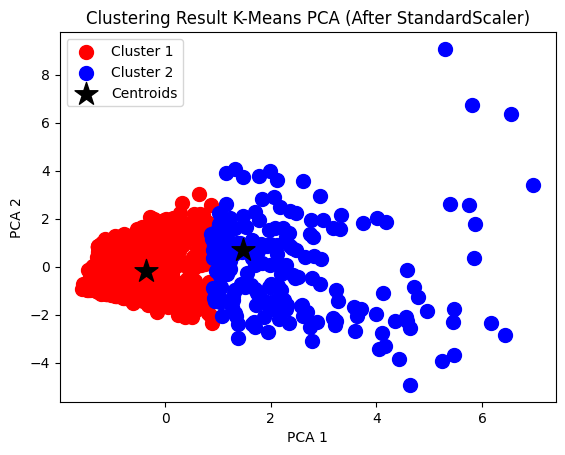

In [706]:
# Warna untuk setiap cluster
colors = ['red', 'blue', 'green', 'yellow', 'purple']

# Cluster visualization using scatter plot
for i in range(2):  # Sesuai jumlah cluster (k=2)
    plt.scatter(kmeans_pca_2d[kmeans_pca_2d['cluster'] == i]['pc1'], 
                kmeans_pca_2d[kmeans_pca_2d['cluster'] == i]['pc2'], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Display the cluster centers
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], 
            s=300, c='black', marker='*', label='Centroids')

# Labels and title
plt.title('Clustering Result K-Means PCA (After StandardScaler)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [707]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_standardized)
print(pca.explained_variance_ratio_.sum()) 


0.7072394560628027


In [708]:
# Separate and store each cluster
cluster0_df = df_result_kmeans[df_result_kmeans.cluster == 0]
cluster1_df = df_result_kmeans[df_result_kmeans.cluster == 1]


## Analisa

In [709]:
# Implement KMeans
kmeans = KMeans(**models.setting[0])
kmeans.fit(df)
pred_kmeans = kmeans.labels_
# Store the coordinates of centroids
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(data=centroids, columns=df.columns)

# Adding the clusters column to the main dataframe (df) and store in new dataframe
kmeans_result_df = pd.concat([df_standardized, pd.DataFrame(pred_kmeans, columns=['cluster'])], axis = 1)
kmeans_result_df

,balance,purchases,cash_advance,credit_limit,purchases_frequency,cluster
0,-0.692312,0.006025,-0.499620,0.397379,0.633911,1
1,-0.546362,0.035176,-0.050783,-0.146138,-0.199485,1
2,-0.561138,0.228126,-0.499620,-0.417896,0.842260,1
3,-0.735619,-0.270655,-0.499620,-0.825534,1.258960,1
4,2.402876,-0.438270,3.760291,0.940895,0.842260,0
...,...,...,...,...,...,...
995,-0.345234,-0.407352,0.138468,-0.907062,-0.526893,1
996,0.033738,-0.484881,1.051633,-0.553776,-1.241233,1
997,-0.344312,-0.367431,-0.499620,0.533258,0.008863,1
998,-0.126367,-0.376477,-0.499620,-0.553776,1.258960,1


In [710]:
centroids

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,4236.400641,0.942896,2598.891542,1602.286119,996.605423,2194.221501,0.578829,0.350613,0.419852,0.203700,5.542289,30.184080,10254.975124,3905.530997,1882.452057,0.123235,11.726368
1,984.479838,0.890748,641.678723,304.165344,337.876333,582.175357,0.475733,0.151581,0.367398,0.115732,2.464330,11.197747,3099.499374,1108.757546,643.151680,0.158781,11.458073


C:\Users\Athaya Rohadatul\AppData\Local\Temp\ipykernel_17100\2837189729.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='cluster', ax=axes[0], palette=dark_colors,


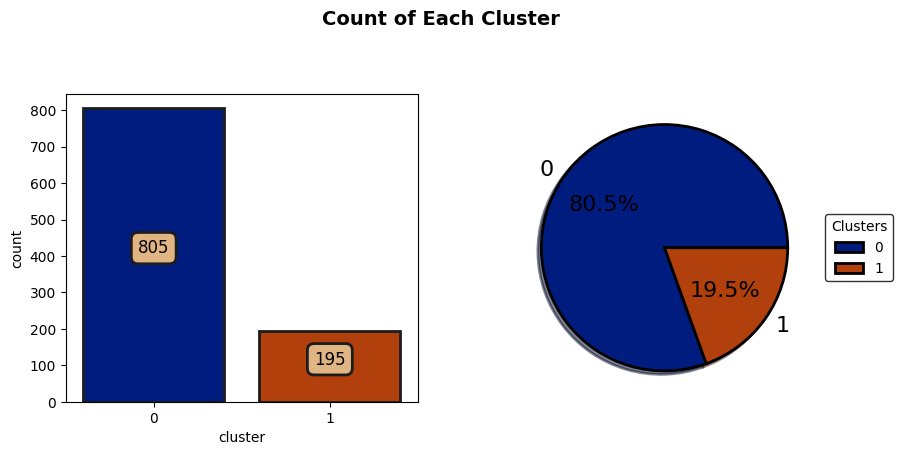

In [711]:
# Implement check_result function for kmeans model again
check_result(df_result_kmeans)

In [712]:
# Separate and store each cluster
cluster0_df = df_result_kmeans[df_result_kmeans.cluster == 0]
cluster1_df = df_result_kmeans[df_result_kmeans.cluster == 1]
cluster2_df = df_result_kmeans[df_result_kmeans.cluster == 2]
dark_colors = sns.color_palette("dark", 10)
# Check distribution of each cluster
def check_hist(df, name, colors=dark_colors):
    """Check histogram of features in each cluster
        df(Dataframe): orginal dataset + cluster column obtained from model
        name(string): name of model (or algorithm)
        colors(list): list of colors using for palette in plot
    """
    
    plt.figure(figsize=(10, 40), dpi=100)
    for i, col in enumerate(df.iloc[:,:-1], 0):
        for j, clus in enumerate(zip(df.cluster.value_counts().sort_index().index, colors[0:int(df.cluster.nunique())]),1):
            plt.subplot(17,int(df.cluster.nunique()),j+i*int(df.cluster.nunique()))
            sns.histplot(df[df.cluster == clus[0]][col], color=clus[1], label=f'cluster {clus[0]}', bins=20)
            plt.ylabel("Counts", labelpad=10)
            plt.xlabel(col, labelpad=10)
            plt.legend()
    plt.suptitle(f"Distribution of Features in {name})",y=1)
    plt.tight_layout(pad=3.0)
    plt.show()

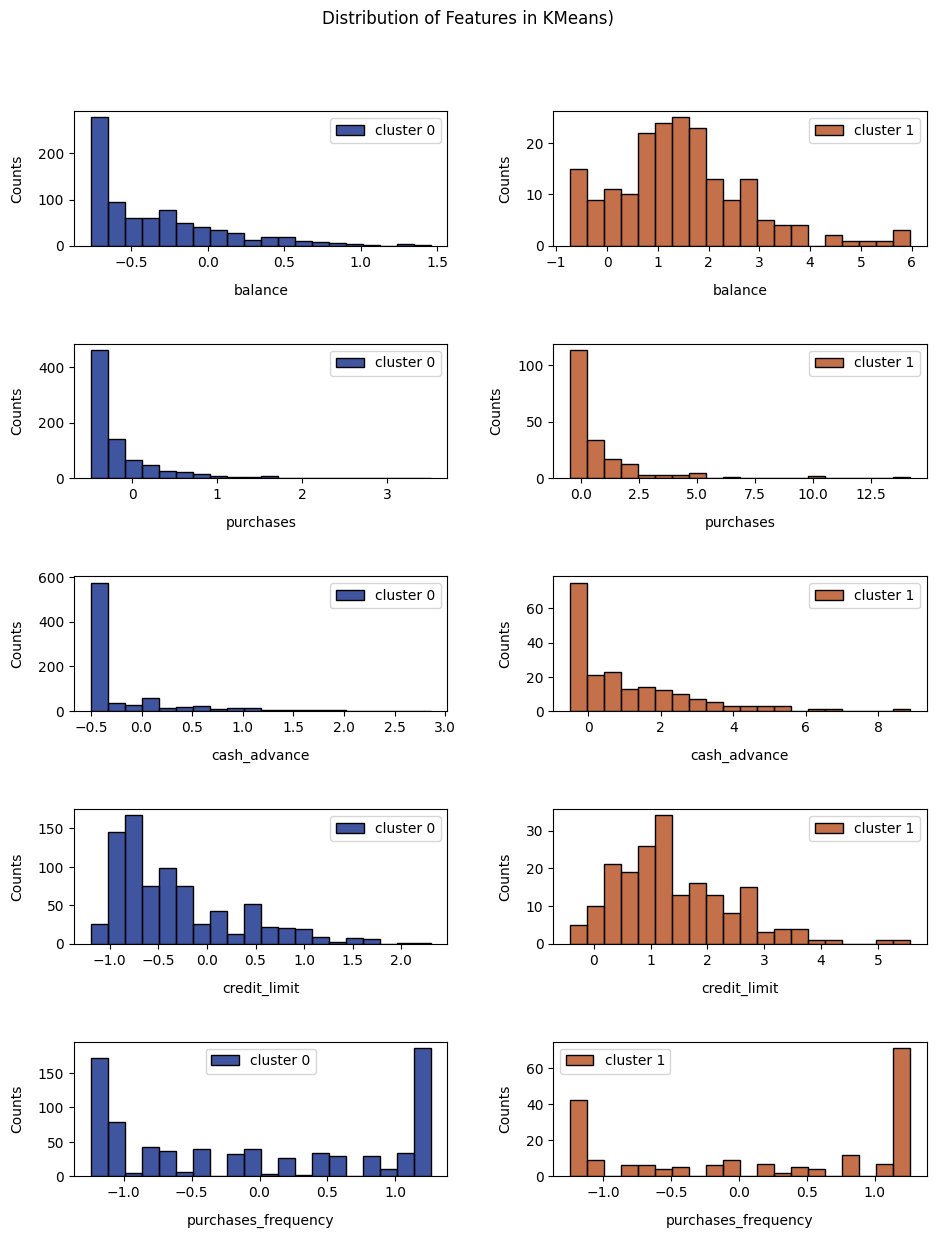

In [713]:
# Implement check_hist fucntion for Kmeans model
check_hist(df_result_kmeans, 'KMeans')

In [714]:
# Check KDE of clusters
def check_kde(df, name):
    """Check KDE of features for each cluster
        df(DataFrame): original dataset + cluster column obtained from model
        name(string): name of model (or algorithm)
    """
    dark_colors = ["darkblue", "darkred", "darkgreen", "purple", "brown", "black"]

    # Pastikan jumlah warna cukup untuk semua cluster
    num_clusters = df.cluster.nunique()
    if len(dark_colors) < num_clusters:
        dark_colors = sns.color_palette("husl", num_clusters)

    plt.figure(figsize=(15, 25), dpi=200)
    
    for i, col in enumerate(df.iloc[:, :-1], 1):
        plt.subplot(6, 3, i)
        sns.kdeplot(data=df, x=col, hue="cluster", fill=True, palette=dark_colors[:num_clusters])
        plt.ylabel("Density", labelpad=10)
        plt.xlabel(col, labelpad=10)

    plt.suptitle(f"Distribution of Each Cluster ({name})", y=1.02)
    plt.tight_layout(pad=3.0)
    plt.show()

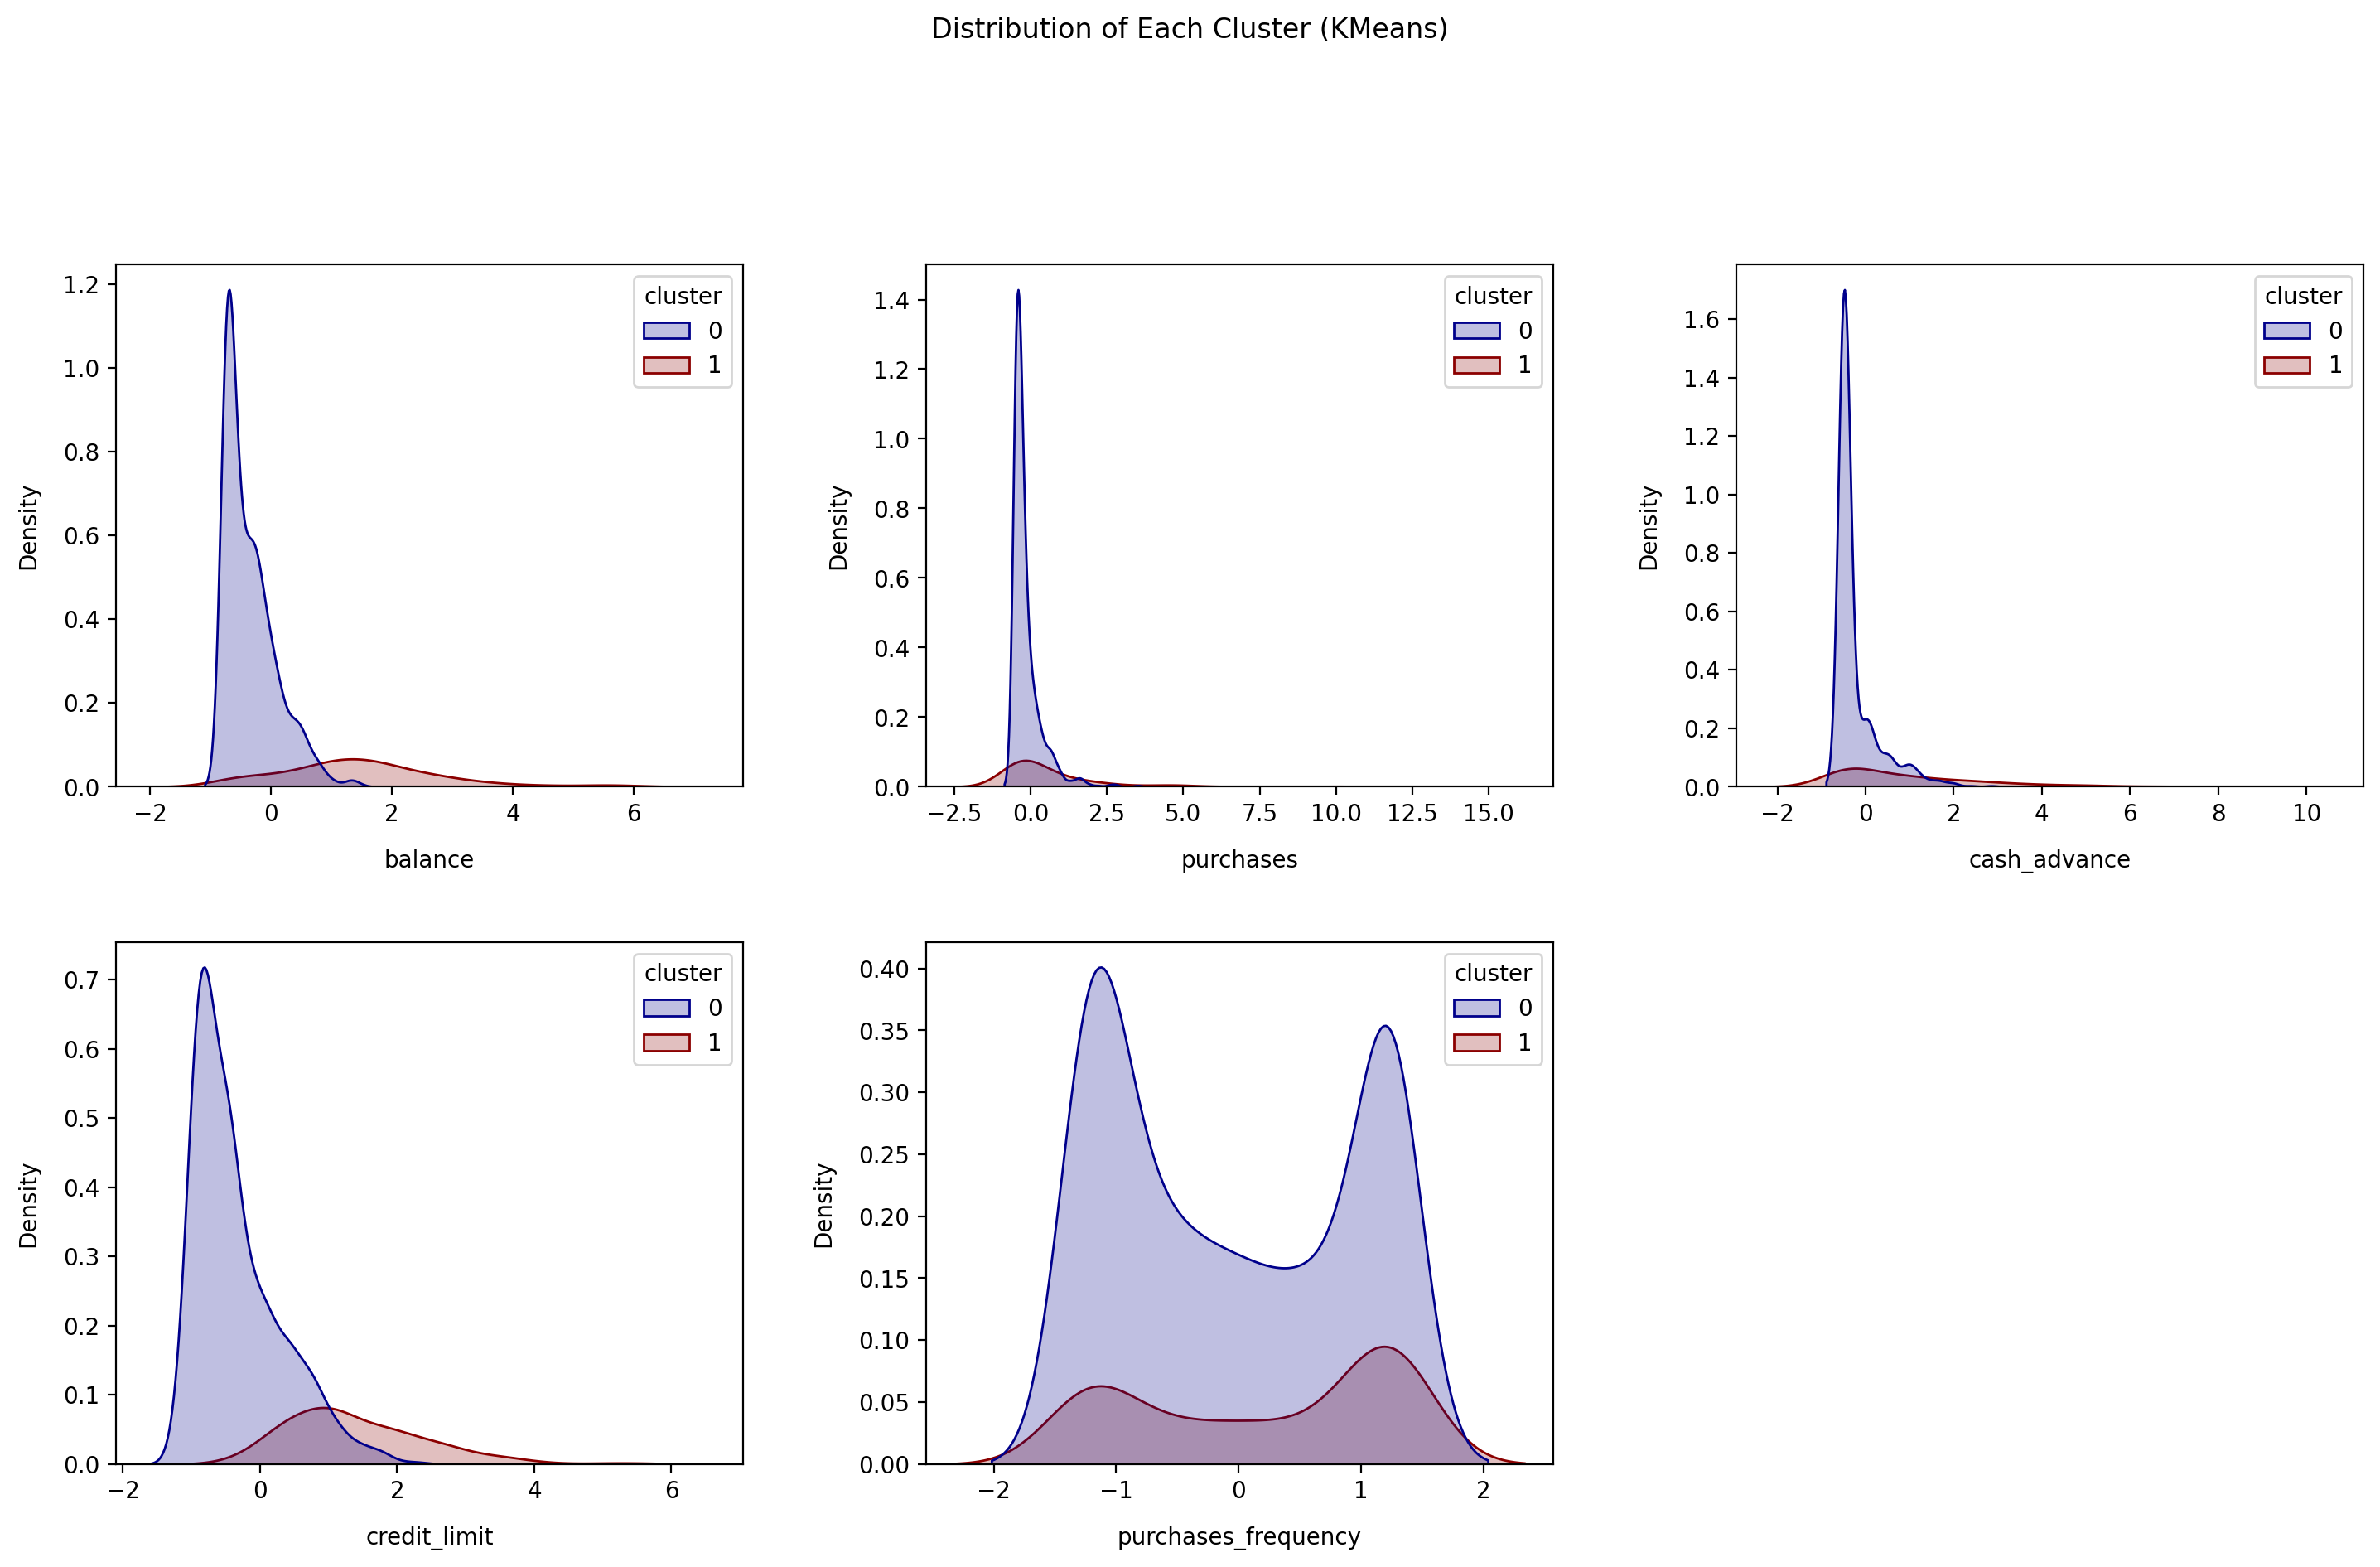

In [715]:
# Implement check_kde for Kmeans model
check_kde(df_result_kmeans, 'KMeans')

c:\Users\Athaya Rohadatul\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Athaya Rohadatul\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Athaya Rohadatul\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Athaya Rohadatul\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Athaya Rohadatul\AppData\Local\Programs\Python\

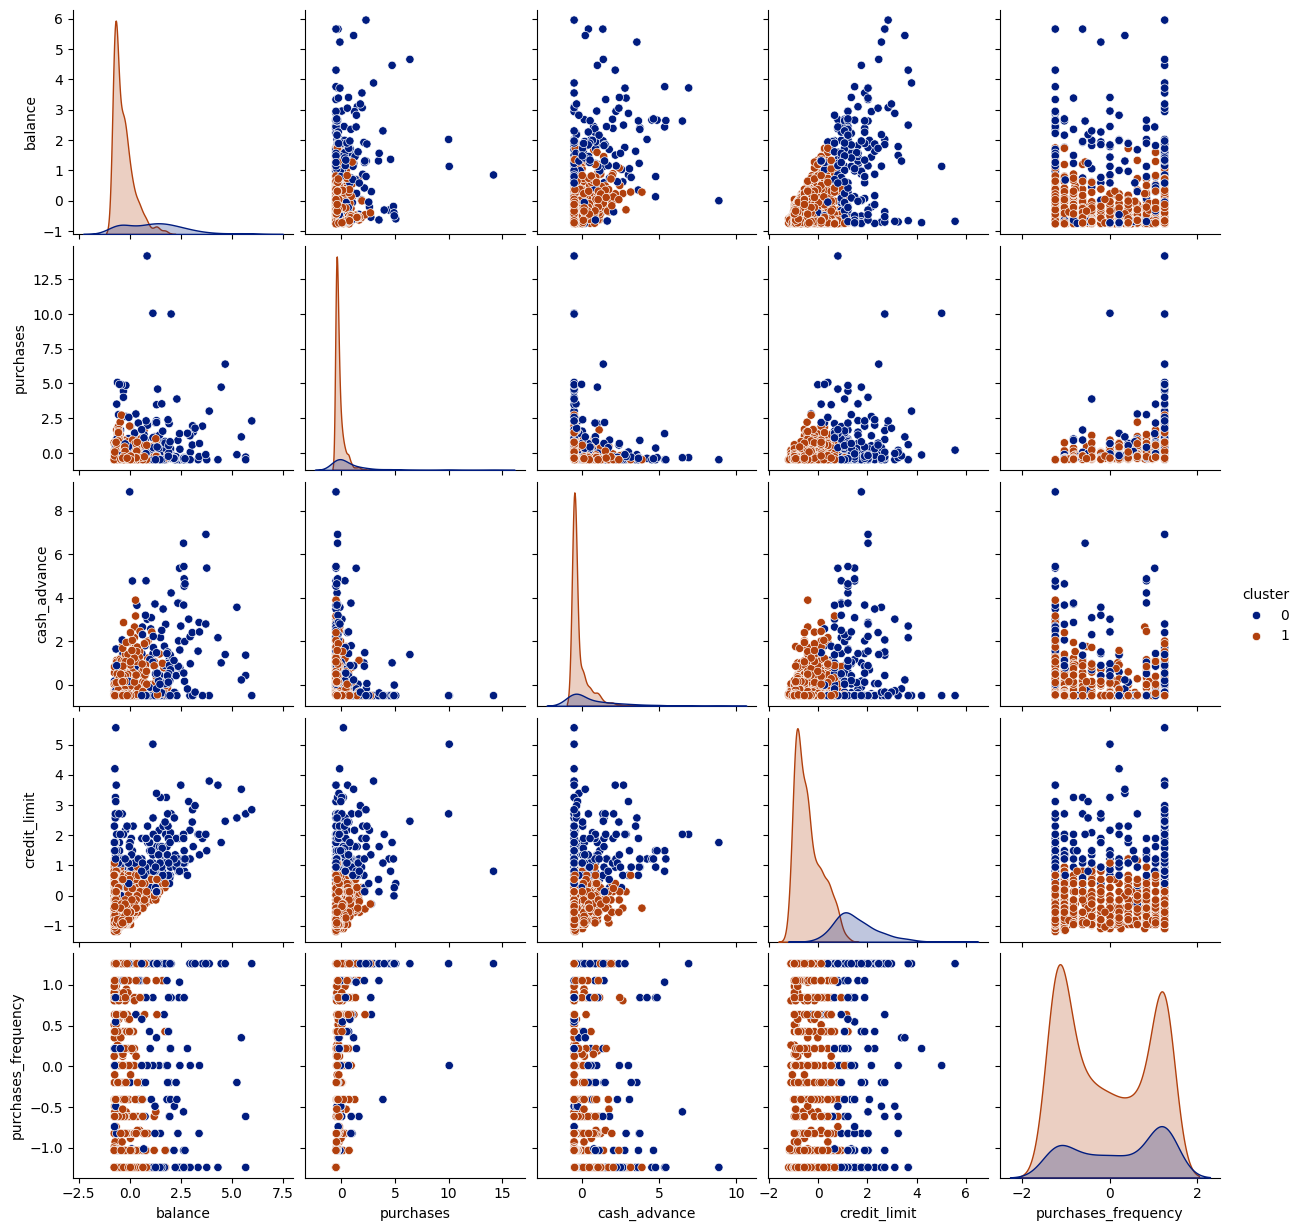

In [716]:
# Check pair plot for results of kmeans model
sns.pairplot(kmeans_result_df, hue='cluster', palette=dark_colors[0:3])
plt.show()

# Hierarchical Clustering (Agglomerative Clustering)

In [717]:
linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(df_standardized)
        
        labels = AC.labels_
        silhouette_avg = silhouette_score(df_standardized, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.35236490106075274
silhoutte score for n_clusters = 3 is 0.3497241074530132
silhoutte score for n_clusters = 4 is 0.23224258472329992
silhoutte score for n_clusters = 5 is 0.24038933144535798
silhoutte score for n_clusters = 6 is 0.2507827390554782
silhoutte score for n_clusters = 7 is 0.24716724790452504
silhoutte score for n_clusters = 8 is 0.2502501764552213
silhoutte score for n_clusters = 9 is 0.2524326691214569

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.7833161359509168
silhoutte score for n_clusters = 3 is 0.5534067818405592
silhoutte score for n_clusters = 4 is 0.5532813611572996
silhoutte score for n_clusters = 5 is 0.5358138030532387
silhoutte score for n_clusters = 6 is 0.4053828738285736
silhoutte score for n_clusters = 7 is 0.4126572100077135
silhoutte score for n_clusters = 8 is 0.4033482785400089
silhoutte score for n_clusters = 9 is 0.4033567225729862

####################

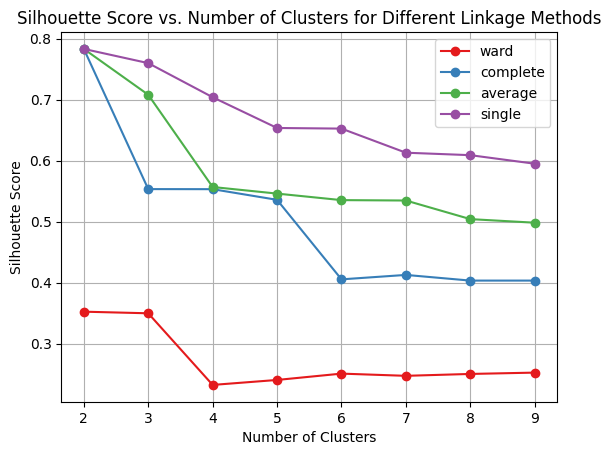

In [718]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

Shape pca_data: (1000, 2)


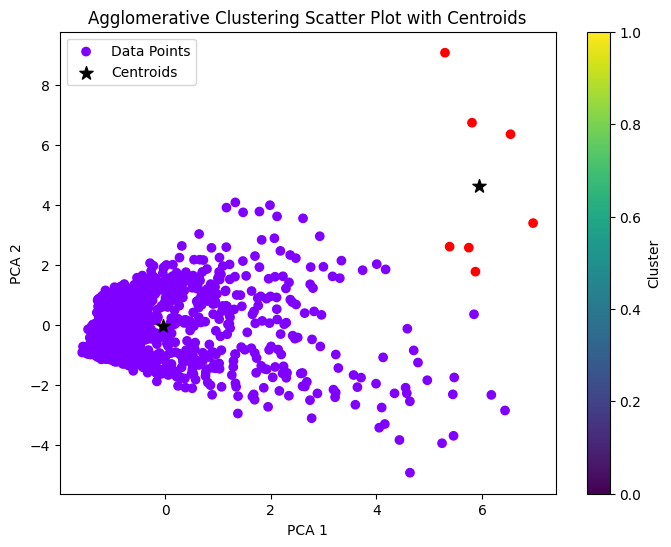

In [719]:
# Pastikan pca_data berbentuk numpy array
pca_data = pca_data.values  # Pastikan data berbentuk numpy array

# Debugging: cek shape data
print("Shape pca_data:", pca_data.shape)

# Agglomerative Clustering dengan 2 cluster dan linkage 'complete'
n_cluster = 2
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='complete')
labels = AC.fit_predict(pca_data)

# Gabungkan hasil clustering dengan data PCA
df_train_with_labels = np.column_stack((pca_data, labels))

# Konversi ke numpy array agar indexing valid
df_train_with_labels = np.array(df_train_with_labels)

# Hitung centroids setiap cluster
centroids = []
for cluster_label in np.unique(labels):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    if len(cluster_data) > 0:  # Cek jika cluster tidak kosong
        cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
        centroids.append(cluster_centroid)

centroids = np.array(centroids)

# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Ambil nilai x dan y dari PCA
x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=100, label='Centroids')

plt.title('Agglomerative Clustering Scatter Plot with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [720]:
linked = sch.linkage(pca_data, 'complete')

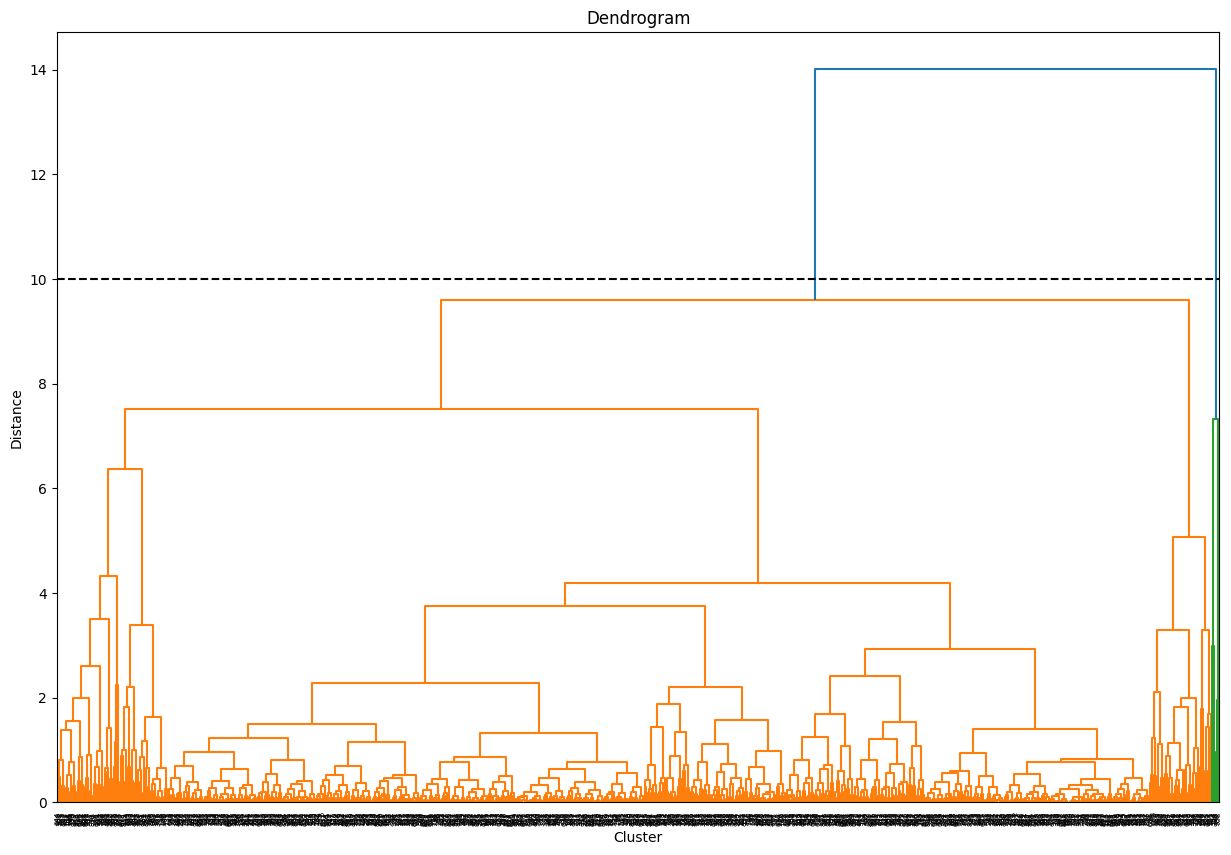

In [721]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=10, color='black', linestyle='--') # at this point, will divide the data into 2 clusters
plt.show()

In [722]:
# Store results obtained from AgglomerativeClustering
best_model.loc[len(best_model.index)] = [
    f"Agglomerative",
    silhouette_score(df, pred),
    {"n_clusters":2}]

In [723]:
unique, counts = np.unique(labels, return_counts=True)

# Tampilkan jumlah isi setiap cluster
cluster_counts = dict(zip(unique, counts))
print("Jumlah data dalam setiap cluster:", cluster_counts)

Jumlah data dalam setiap cluster: {0: 993, 1: 7}


In [724]:
# # Implement check_result function for AgglomerativeClustering model
# check_result(labels)

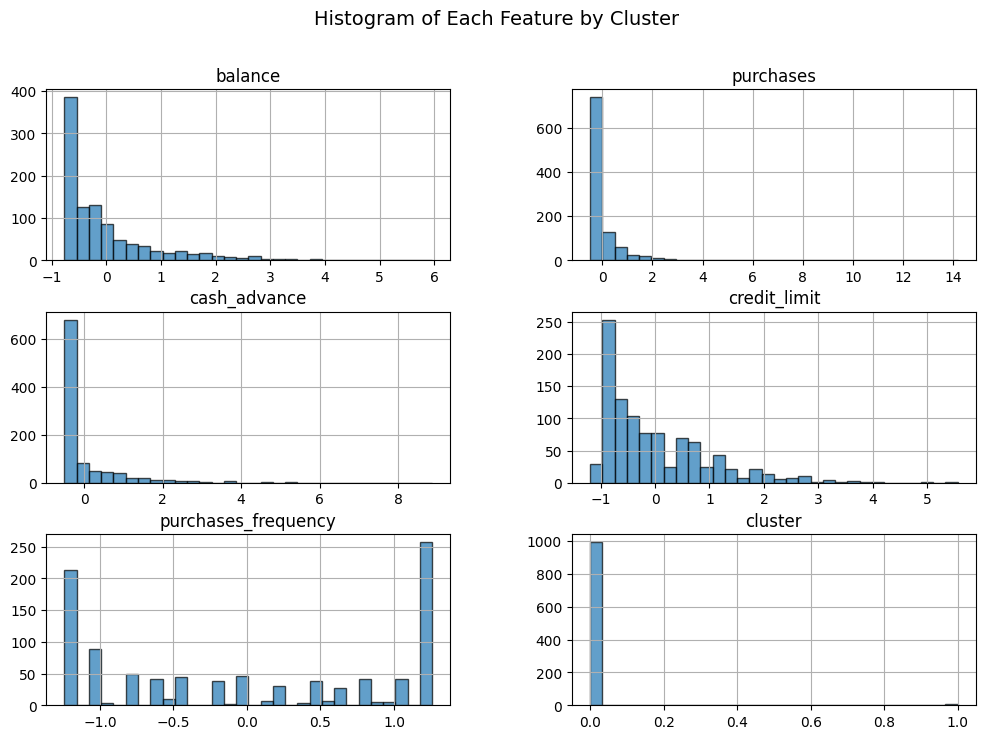

In [725]:
# Tambahkan hasil clustering ke DataFrame asli
df_result_agglo = df_standardized.copy()
df_result_agglo['cluster'] = labels  # Menambahkan kolom cluster hasil Agglomerative Clustering

# Plot histogram untuk setiap fitur
df_result_agglo.hist(figsize=(12, 8), bins=30, edgecolor='black', alpha=0.7)
plt.suptitle("Histogram of Each Feature by Cluster", fontsize=14)
plt.show()

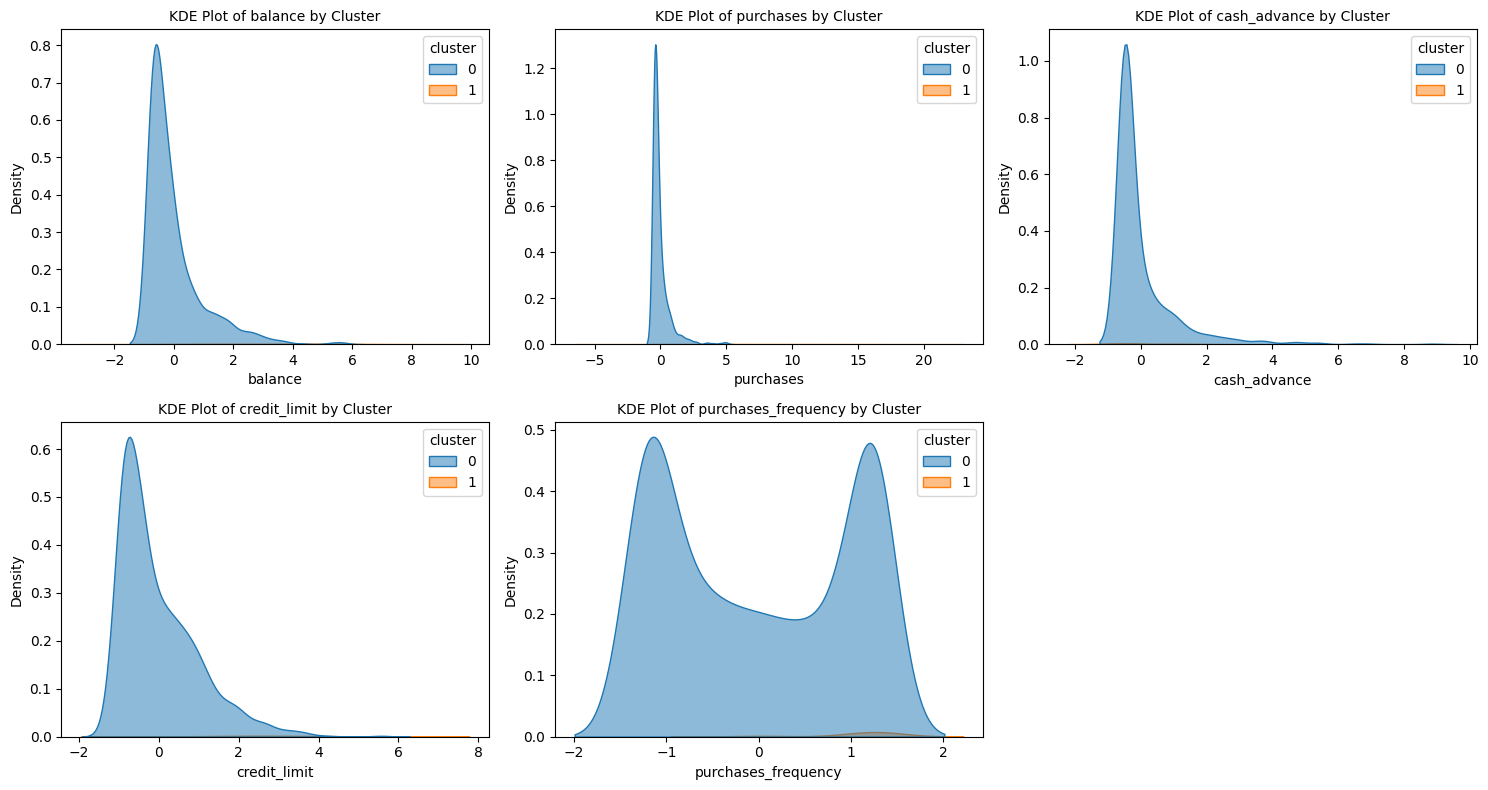

In [726]:
# List semua fitur kecuali 'cluster'
features = df_standardized.columns

# Tentukan jumlah baris dan kolom (3 kolom per baris)
n_cols = 3
n_rows = len(features) // n_cols + (len(features) % n_cols > 0)  # Hitung jumlah baris otomatis

# Buat figure dan axes untuk subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))  
axes = axes.flatten()  # Flatten supaya bisa loop lebih mudah

# Loop untuk setiap fitur
for i, col in enumerate(features):
    sns.kdeplot(data=df_result_agglo, x=col, hue="cluster", fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {col} by Cluster", fontsize=10)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Atur layout supaya tidak bertumpukan
plt.show()

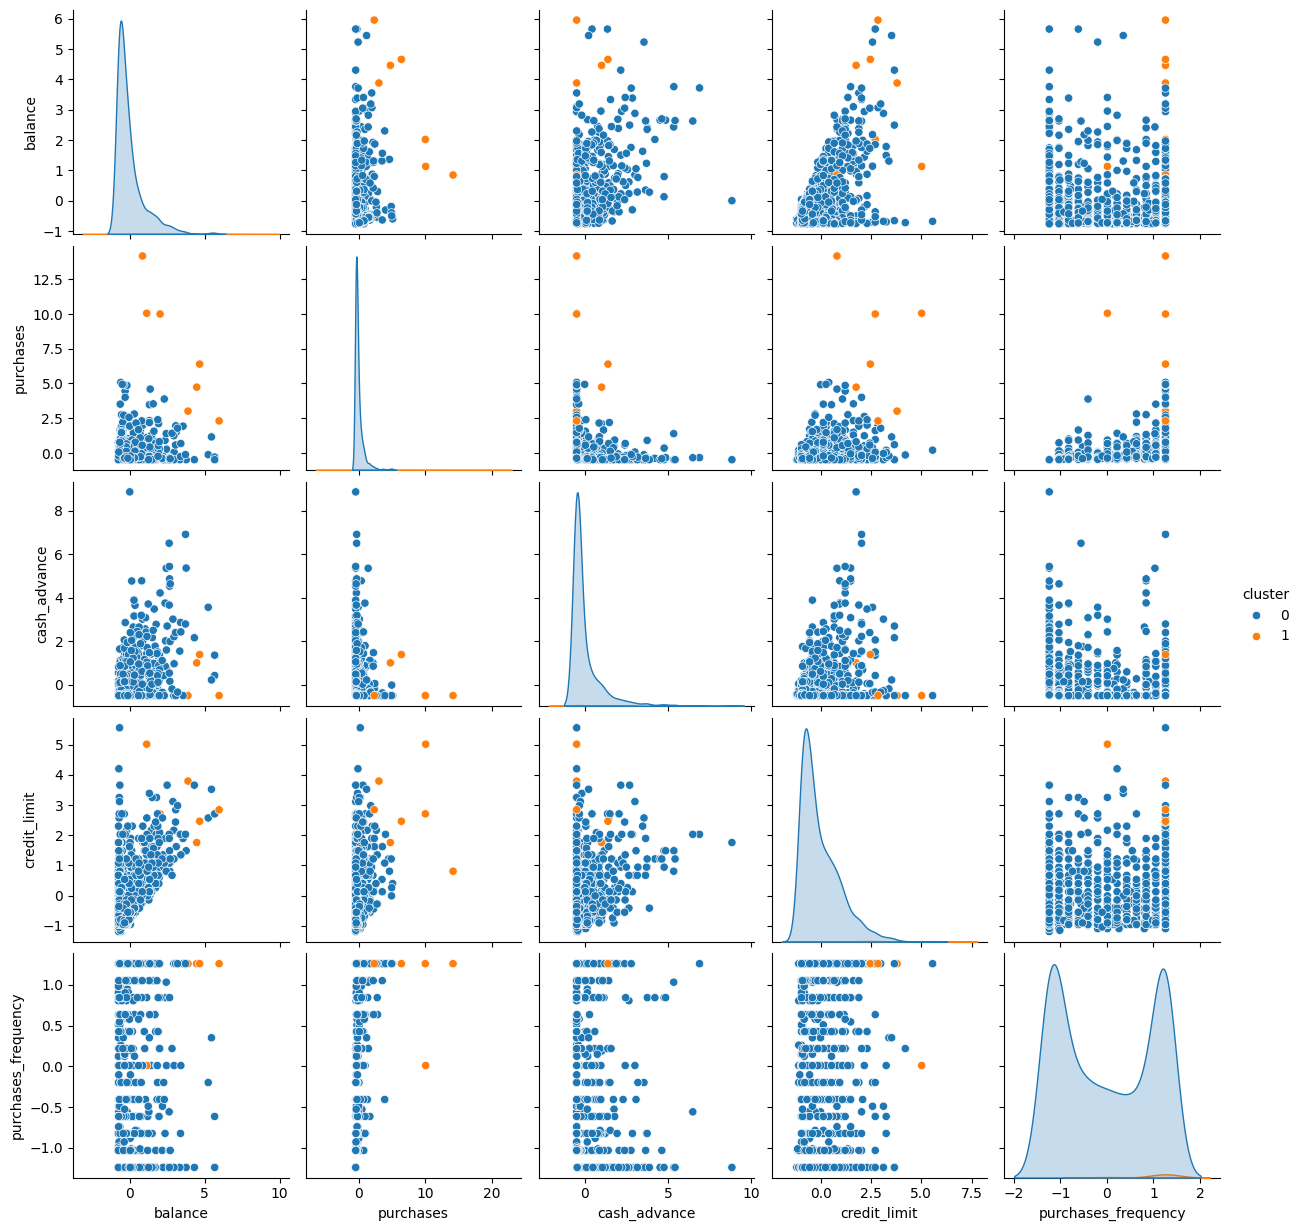

In [727]:
sns.pairplot(df_result_agglo, hue='cluster', palette='tab10', diag_kind='kde')
plt.show()


In [728]:
best_model

,Model,Sil_score,setting
0,Kmeans,0.447312,"{'n_clusters': 2, 'init': 'random', 'n_init': ..."
1,Agglomerative,0.395721,{'n_clusters': 2}


# DBSCAN

In [729]:
epsilon = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
min_samples = [10, 15, 20, 25]

sil_avg = []
max_value = (0, 0, 0, -1)  # Initialize max_value with a negative silhouette score

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(pca_data)

        # Check if there are at least two clusters
        unique_labels = set(db.labels_)
        if len(unique_labels) >= 2:
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            silhouette_avg = silhouette_score(pca_data, labels)
            sil_avg.append(silhouette_avg)

            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])

epsilon = 3.75 
min_samples = 10 
number of clusters = 1 
average silhouette score = 0.7914


In [730]:
db=DBSCAN(eps=2.5, min_samples=15, metric='euclidean')
db.fit(pca_data)

DBSCAN(eps=2.5, min_samples=15)

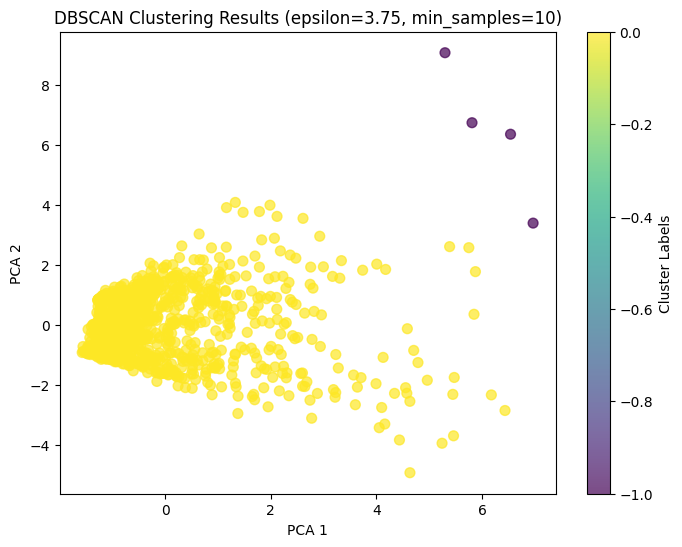

In [731]:
best_epsilon = max_value[0]
best_min_samples = max_value[1]
best_labels = db.labels_ 

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.7)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering Results (epsilon={}, min_samples={})'.format(best_epsilon, best_min_samples))

plt.colorbar(label='Cluster Labels')
plt.show()

In [732]:
# Store results obtained from DBSCAN
best_model.loc[len(best_model.index)] = [
    f"DBSCAN",
    silhouette_avg,
    {"eps":3.75, "min_samples":10}]

In [733]:
best_model

,Model,Sil_score,setting
0,Kmeans,0.447312,"{'n_clusters': 2, 'init': 'random', 'n_init': ..."
1,Agglomerative,0.395721,{'n_clusters': 2}
2,DBSCAN,0.775850,"{'eps': 3.75, 'min_samples': 10}"
